<a href="https://colab.research.google.com/github/dhruvsuri8106-code/ECON-3916---Statistical-and-Machine-Learning/blob/main/Assignment%202%20/%20Econ_3916_Assignment_2_Audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
normal_traffic = np.random.randint(20, 50, 980)
spike_traffic = np.random.randint(1000, 5000, 20)
latency_logs = np.concatenate([normal_traffic, spike_traffic])

In [4]:
def calculate_mad(latency_logs):
    latency_logs_median = np.median(latency_logs)
    absolute_deviations = np.abs(latency_logs - latency_logs_median)
    mad = np.median(absolute_deviations)
    return mad

The Standard deviation is "blown up" by outliers because it is an average of how far each data point is from the mean, so certain data points that are especially far from the mean can influence this number to be more extreme. The MAD simply takes the middle number of all distances from the mean, so even if a few data points are especially far, the MAD does not let this influence it.

In [5]:
def bayesian_audit(prior, sensitivity, specificity):

    p_cheater = prior
    p_not_cheater = 1 - prior
    p_flag_given_cheater = sensitivity
    p_flag_given_not_cheater = 1 - specificity
    posterior_probability = (p_flag_given_cheater * p_cheater) / (
        (p_flag_given_cheater * p_cheater) +
        (p_flag_given_not_cheater * p_not_cheater) )

    return posterior_probability

In [6]:
print(bayesian_audit(0.5, 0.98, 0.98))
print(bayesian_audit(0.05, 0.98, 0.98))
print(bayesian_audit(0.001, 0.98, 0.98))


0.98
0.7205882352941175
0.04675572519083965


In [7]:
observed = np.array([50250, 49750])
expected = np.array([50000, 50000])

chi_square = 0

for i in range(len(observed)):
    chi_square = (observed[i] - expected[i])**2 / expected[i]

print(chi_square)


1.25


The experiment is valid, this is less than 3.84

Total tokens simulated: 10,000
Survivors (top 1%): 100
Mean Peak Market Cap (ALL):       $242.33
Mean Peak Market Cap (SURVIVORS): $3,096.94
Survivorship Bias Multiplier: 12.8x


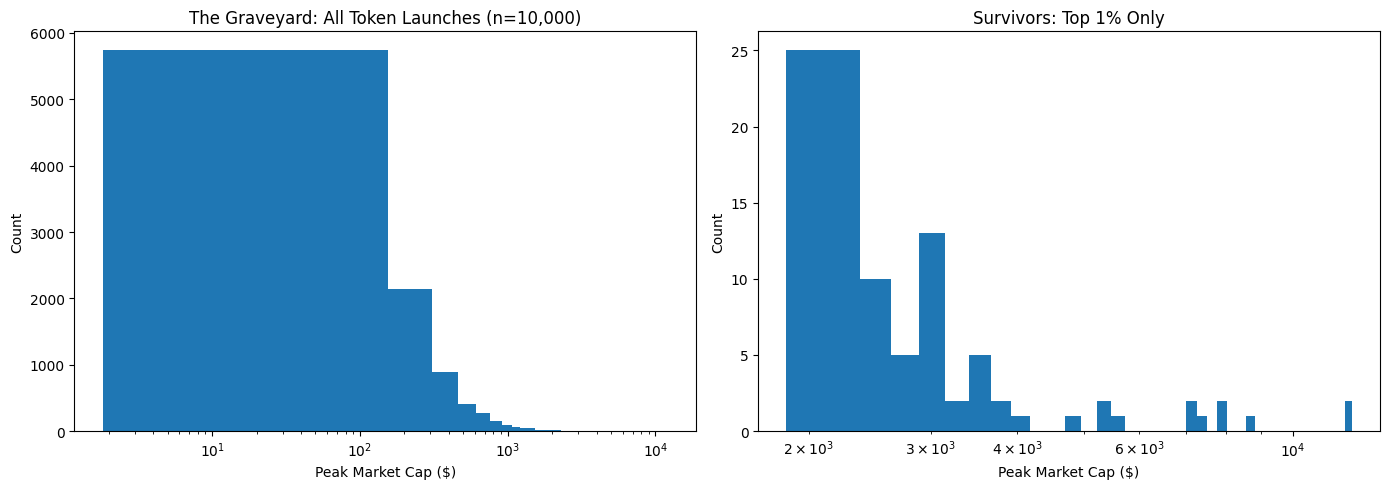

In [9]:

np.random.seed(42)


n = 10_000
top_pct = 0.01


alpha = 2.2
xm = 1_000

peak_market_cap = xm * (1 + np.random.pareto(alpha, size=n))


compression = np.random.lognormal(mean=-2.5, sigma=1.0, size=n)
peak_market_cap = peak_market_cap * compression


df_all = pd.DataFrame({
    "token_id": np.arange(1, n + 1),
    "peak_market_cap": peak_market_cap
})


cutoff = df_all["peak_market_cap"].quantile(1 - top_pct)
df_survivors = df_all[df_all["peak_market_cap"] >= cutoff].copy()


mean_all = df_all["peak_market_cap"].mean()
mean_survivors = df_survivors["peak_market_cap"].mean()

print(f"Total tokens simulated: {len(df_all):,}")
print(f"Survivors (top {int(top_pct*100)}%): {len(df_survivors):,}")
print(f"Mean Peak Market Cap (ALL):       ${mean_all:,.2f}")
print(f"Mean Peak Market Cap (SURVIVORS): ${mean_survivors:,.2f}")
print(f"Survivorship Bias Multiplier: {mean_survivors/mean_all:,.1f}x")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df_all["peak_market_cap"], bins=80)
axes[0].set_title("The Graveyard: All Token Launches (n=10,000)")
axes[0].set_xlabel("Peak Market Cap ($)")
axes[0].set_ylabel("Count")
axes[0].set_xscale("log")

axes[1].hist(df_survivors["peak_market_cap"], bins=40)
axes[1].set_title("Survivors: Top 1% Only")
axes[1].set_xlabel("Peak Market Cap ($)")
axes[1].set_ylabel("Count")
axes[1].set_xscale("log")

plt.tight_layout()
plt.show()
